In [1]:
# define constants
input_dataset_parent_path = '/home/vamshikrishnadude/Downloads/Driving-range-Prediction-and-Energy-Consumption-in-EV-s/input_dataset/'
path_to_stage0_csv = input_dataset_parent_path+ 'preprocessed_stage0.csv'

In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import os
from IPython.core.display import display

In [3]:
df = pd.read_csv(path_to_stage0_csv);
display(df.head(5))

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,50.0,12.29,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
1,43.0,8.68,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
2,44.0,1.50,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
3,76.0,14.44,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
4,15.0,6.84,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7


# Univariate Analysis

/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

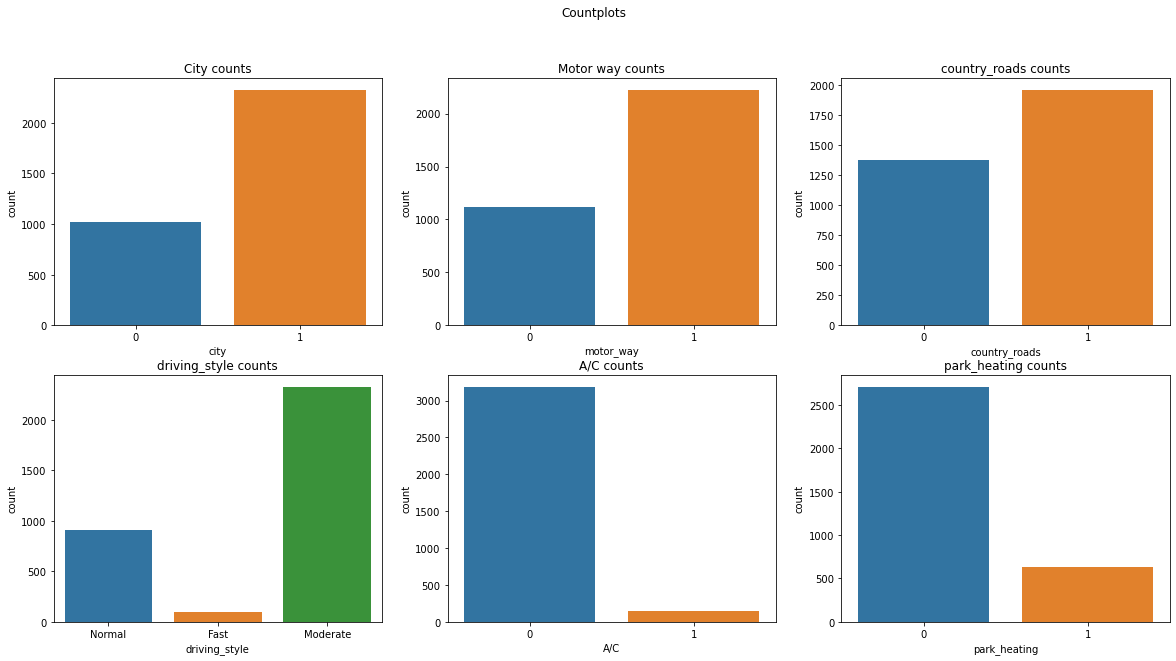

In [4]:
# city
plt.figure(figsize=(20, 10))
plt.suptitle("Countplots")
plt.subplot(2, 3, 1)
plt.title("City counts")
sb.countplot(df['city'])

plt.subplot(2, 3, 2)
plt.title("Motor way counts")
sb.countplot(df['motor_way'])

plt.subplot(2, 3, 3)
plt.title("country_roads counts")
sb.countplot(df['country_roads'])

plt.subplot(2, 3, 4)
plt.title("driving_style counts")
sb.countplot(df['driving_style'])

plt.subplot(2, 3, 5)
plt.title("A/C counts")
sb.countplot(df['A/C'])

plt.subplot(2, 3, 6)
plt.title("park_heating counts")
sb.countplot(df['park_heating'])

plt.show()

**Observations**
* EV's trials are mostly in City and one way, moderately drived.
* EV's trials with a/c is on is very less. so the data is biased towards non-ac trials and with no park heating.

/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


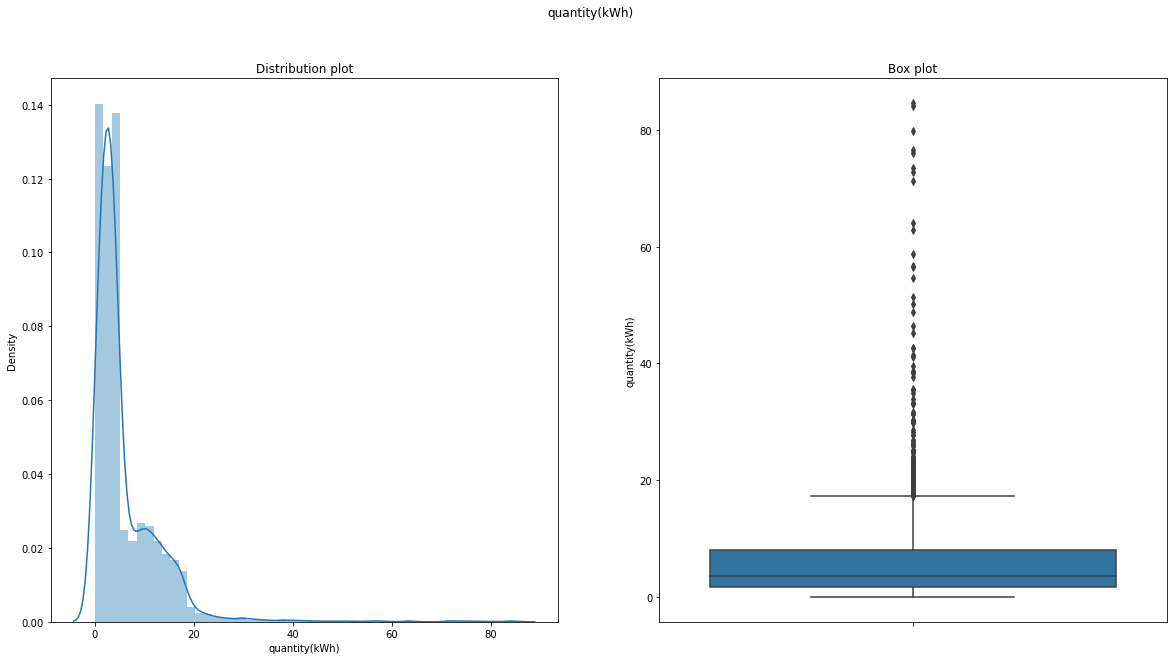

In [5]:
# quantity(kWh)
plt.figure(figsize=(20, 10))
plt.suptitle("quantity(kWh)")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sb.distplot(df['quantity(kWh)'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sb.boxplot(y=df['quantity(kWh)'])

plt.show()

**Observations**
* The distribution is right skewed. We can see the outliers in range >= 40

/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


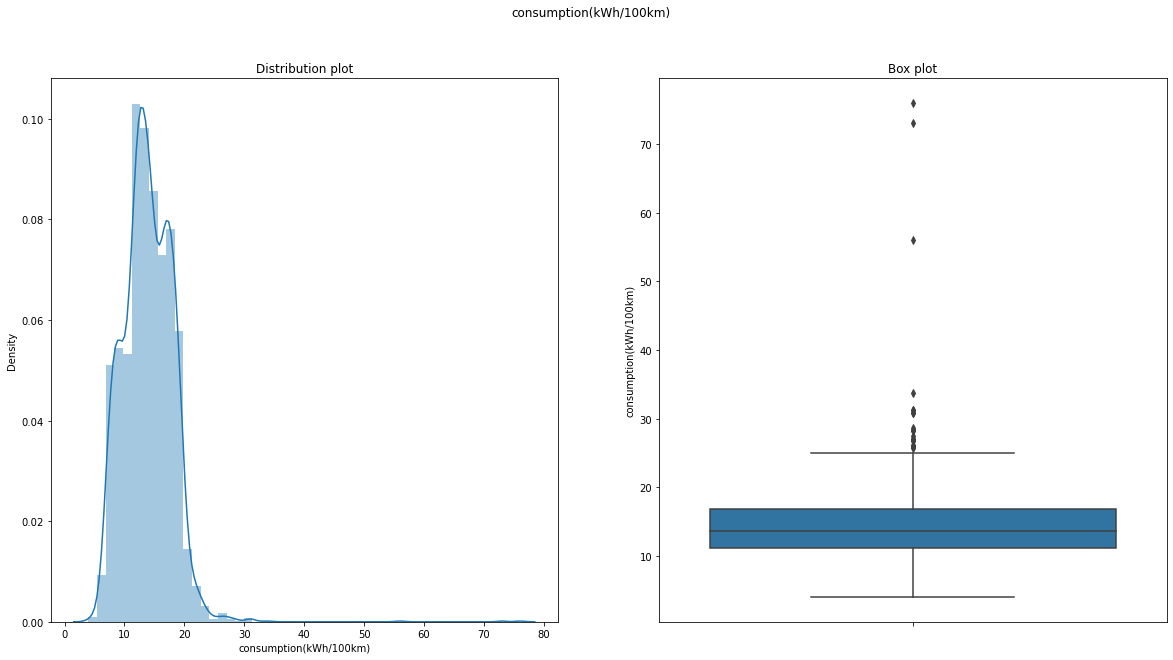

In [6]:
# consumption(kWh/100km)

plt.figure(figsize=(20, 10))
plt.suptitle("consumption(kWh/100km)")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sb.distplot(df['consumption(kWh/100km)'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sb.boxplot(y=df['consumption(kWh/100km)'])

plt.show()

**Observations**
* The distribution is near normal with right skewed.
* There are very few outliers  above 50 kwh/100km

/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


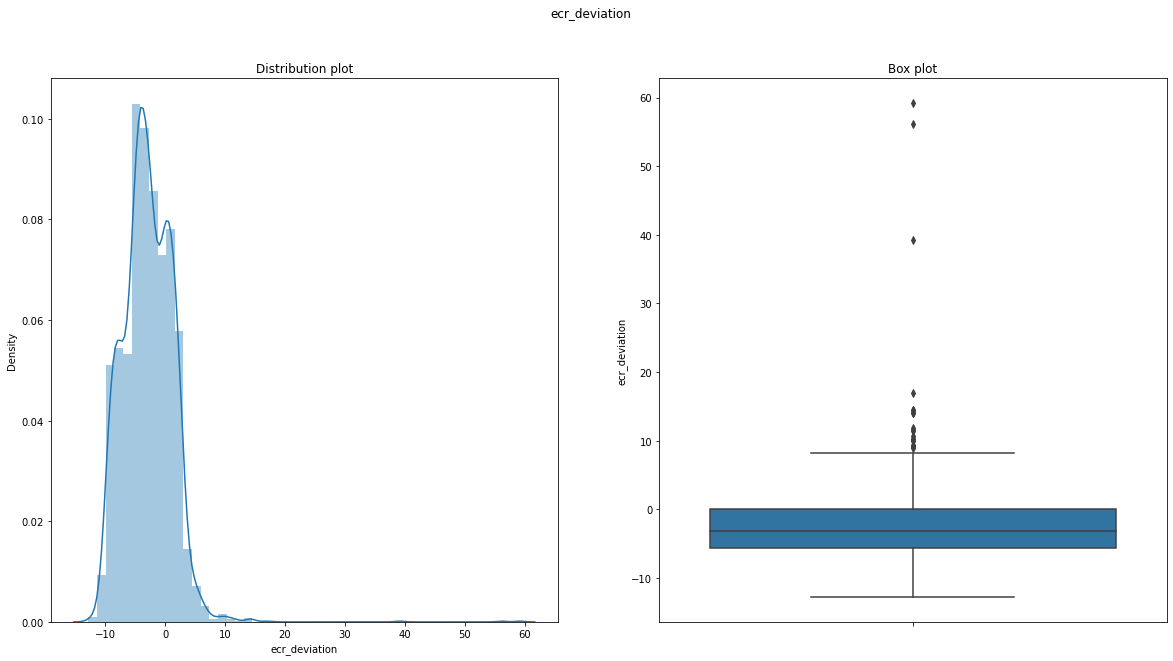

In [7]:
# ecr_deviation
plt.figure(figsize=(20, 10))
plt.suptitle("ecr_deviation")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sb.distplot(df['ecr_deviation'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sb.boxplot(y=df['ecr_deviation'])

plt.show()

In [8]:
df['ecr_deviation'].describe()

count    3340.000000
mean       -2.879608
std         4.183439
min       -12.800000
25%        -5.600000
50%        -3.100000
75%         0.000000
max        59.200000
Name: ecr_deviation, dtype: float64

/home/vamshikrishnadude/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


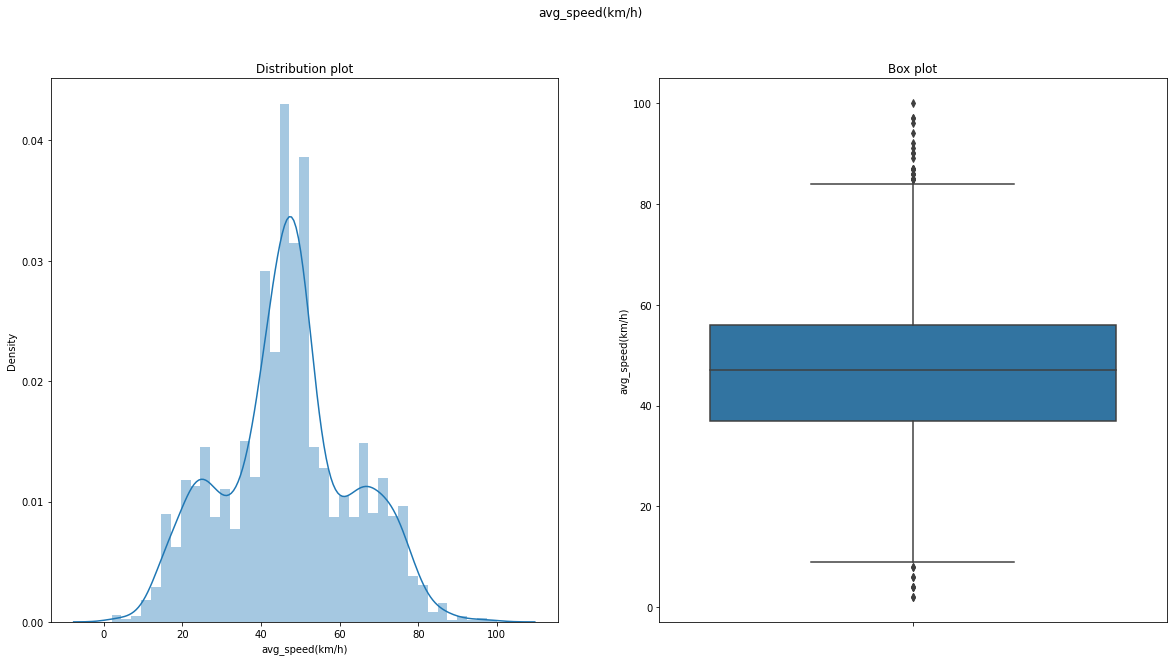

In [9]:
# avg_speed(km/h)

plt.figure(figsize=(20, 10))
plt.suptitle("avg_speed(km/h)")
plt.subplot(1, 2, 1)
plt.title("Distribution plot")
sb.distplot(df['avg_speed(km/h)'], kde = True)

plt.subplot(1, 2, 2)
plt.title("Box plot")
sb.boxplot(y=df['avg_speed(km/h)'])

plt.show()

**Observations**
* The distribution is near normal. with left and right skewness but very small. We see the outliers bewlow 10 and above 80 km/h.

# Bivariate Analysis

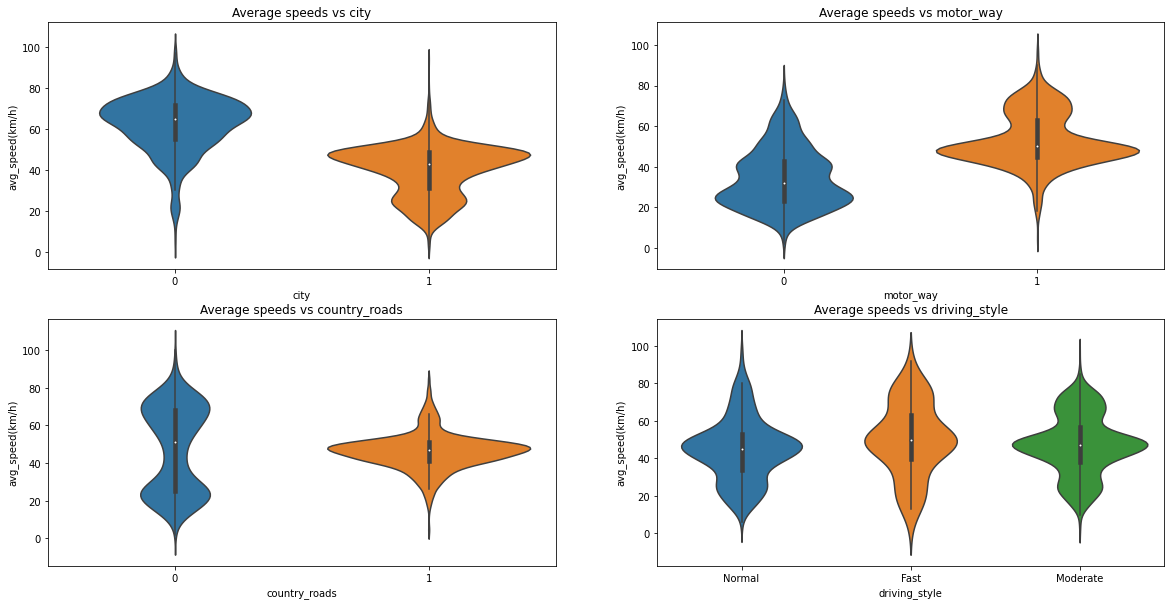

In [10]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Average speeds vs city")
sb.violinplot(x = 'city', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 2)
plt.title("Average speeds vs motor_way")
sb.violinplot(x = 'motor_way', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 3)
plt.title("Average speeds vs country_roads")
sb.violinplot(x = 'country_roads', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 4)
plt.title("Average speeds vs driving_style")
sb.violinplot(x = 'driving_style', y = 'avg_speed(km/h)', data = df)

plt.show()

**Observation**
* InterQuartile Range of Avg_speed is clearly separated among city's. City '0' have higher avg speeds.
* InterQuartile Range of Avg_speed is clearly separated among motor_way's. Motor_way '1' have higher avg speeds.
* avg speed range is widespread in countryroad '0' compare to '1'.

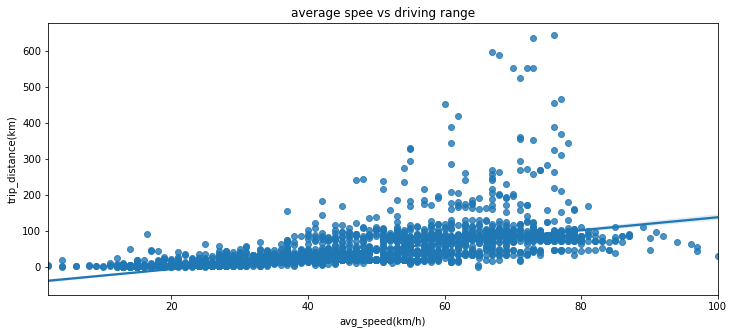

In [11]:
# role of avg_speed in driving_range
plt.figure(figsize=(12, 5))
plt.title("average spee vs driving range")
sb.regplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = df)
plt.show()

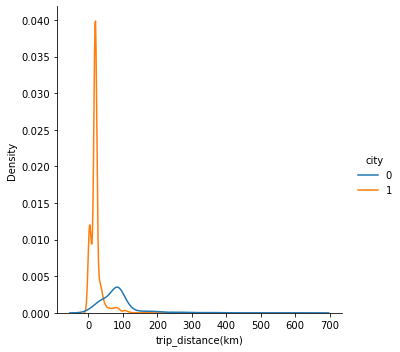

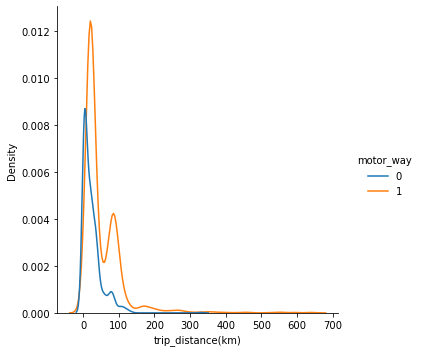

In [12]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")

sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='city')
sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='motor_way')

**Observations**
* We can see data points having an upward trend till 80 km/hr, so the avg_speed will be a feature to consider for distance range.
* tripdistance is lower in city's 
* one way have larger distance distance ranges with more frequencies in (50 - 300 km). one way has more than 350km range.

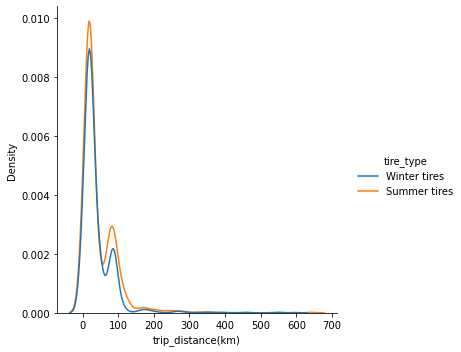

In [13]:
# tire_type on trip distance.
sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='tire_type')

**Observation**
* trip distance distribution is same for all tire types. may be this is not a useful feature for predicting distance_range.

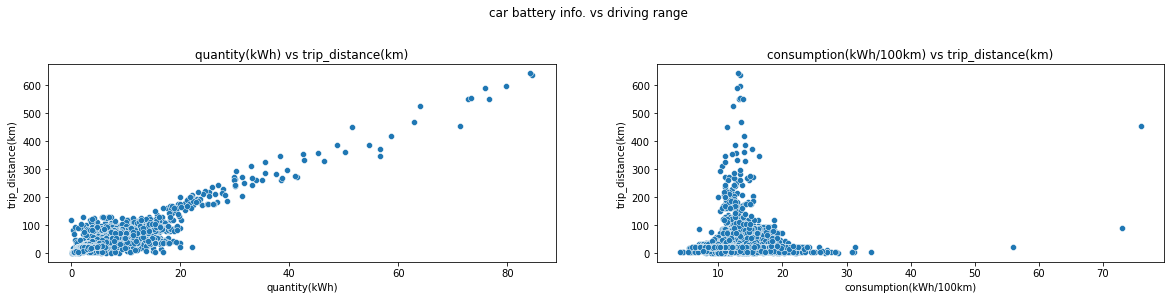

In [14]:
# Quantity on trip distance
plt.figure(figsize=(20, 8))
plt.suptitle("car battery info. vs driving range")
plt.subplot(2, 2, 1)
plt.title("quantity(kWh) vs trip_distance(km)")
sb.scatterplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = df)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs trip_distance(km)")
sb.scatterplot(x = 'consumption(kWh/100km)', y = 'trip_distance(km)', data = df)
plt.show()

**Observation**
* quantity above 20kwh is directly proportional to trip distance.
* quantity in range 0 to 20, maynot alone determine the trip distance, we need to combine some more features to determine the tripdistance for quantity kwh
* trip distance is higher in EV's having energy consumption range  in 10 to 20.

<AxesSubplot:title={'center':'consumption(kWh/100km) vs park_heating'}, xlabel='park_heating', ylabel='consumption(kWh/100km)'>

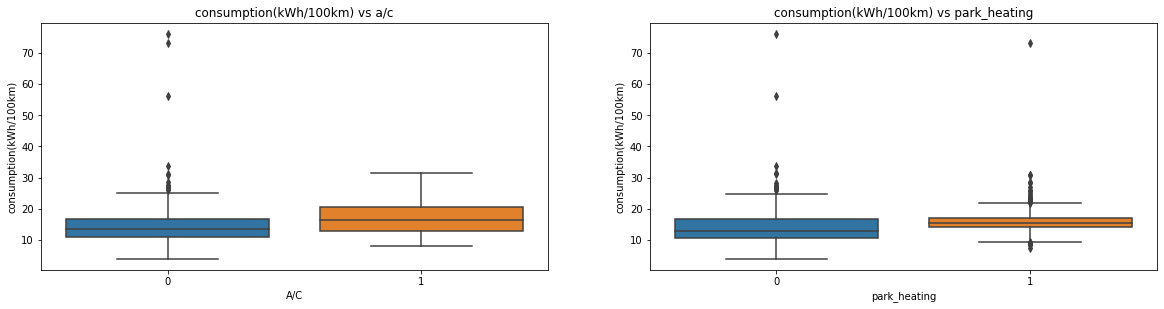

In [15]:
# a/c and park_heating in energy consumption

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("consumption(kWh/100km) vs a/c")
sb.boxplot(x = 'A/C', y = 'consumption(kWh/100km)', data = df)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs park_heating")
sb.boxplot(x = 'park_heating', y = 'consumption(kWh/100km)', data = df)

**Observations**
* The energy consumption levels are higher with A/C on and park heating (range is within no park_heating)comparatively.

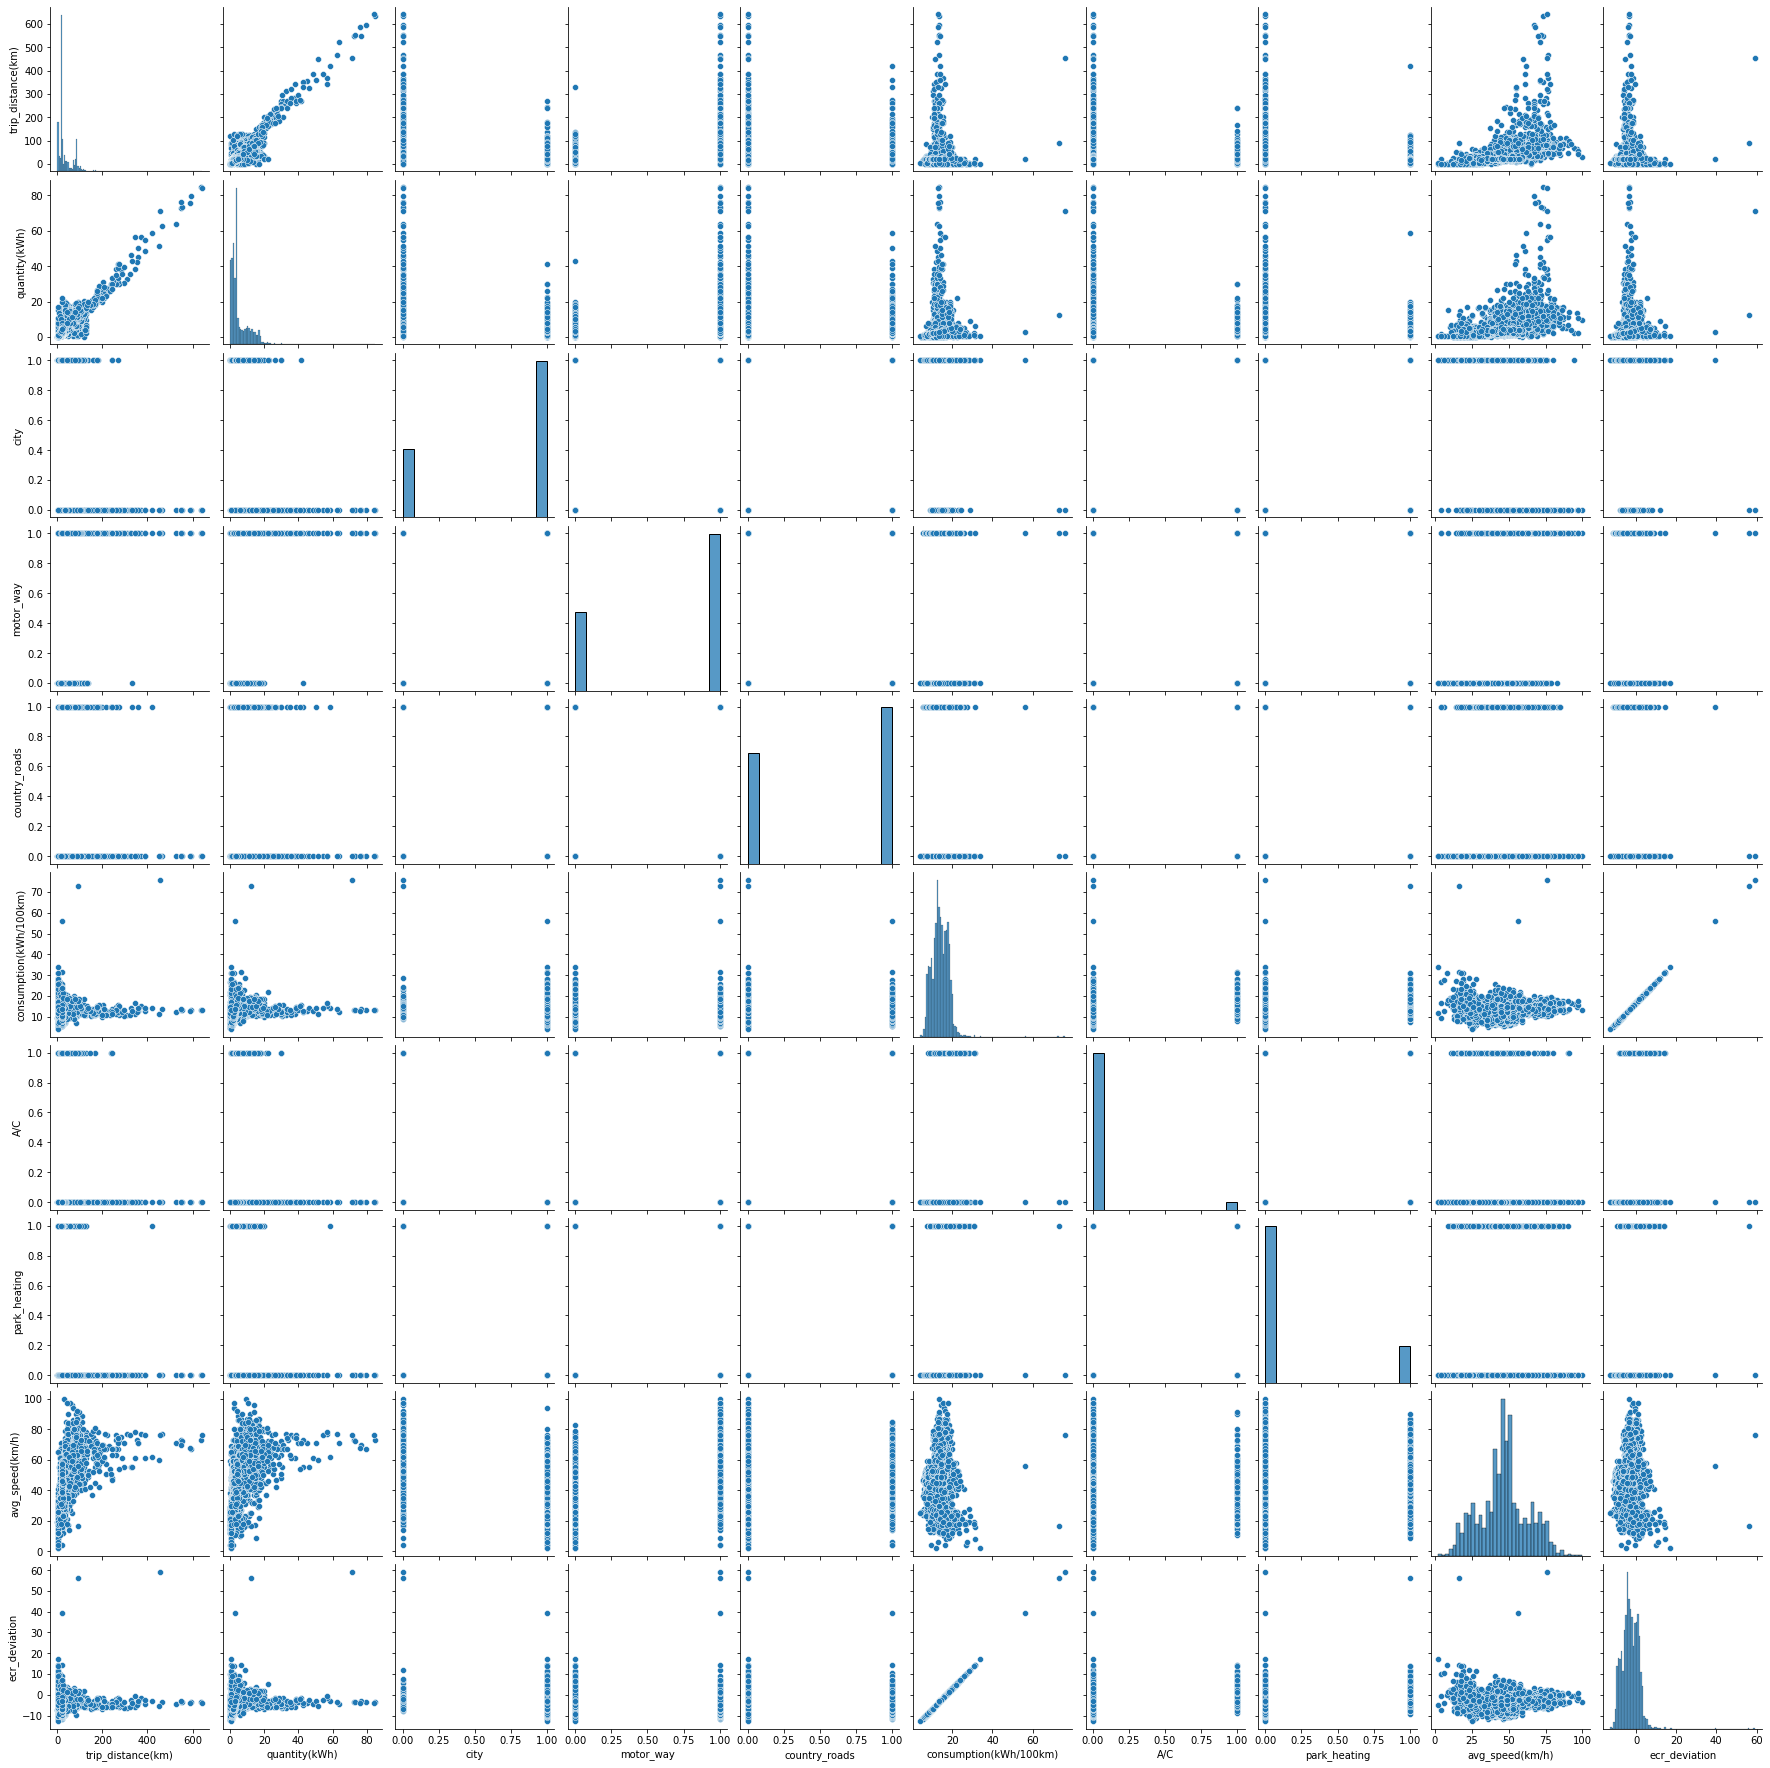

In [16]:
sb.pairplot(df)

In [31]:
df.corr()

,trip_distance(km),quantity(kWh),city,motor_way,country_roads,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
trip_distance(km),1.000000,0.919314,-0.580042,0.241426,-0.212884,-0.023481,-0.025792,0.121538,0.549214,-0.023481
quantity(kWh),0.919314,1.000000,-0.600179,0.246189,-0.235485,0.104614,-0.010254,0.216558,0.530648,0.104614
city,-0.580042,-0.600179,1.000000,-0.261154,0.411102,-0.030727,0.052378,-0.402743,-0.638699,-0.030727
motor_way,0.241426,0.246189,-0.261154,1.000000,0.122945,0.099365,0.037404,0.077652,0.538162,0.099365
country_roads,-0.212884,-0.235485,0.411102,0.122945,1.000000,-0.038109,0.011543,-0.169260,-0.037784,-0.038109
consumption(kWh/100km),-0.023481,0.104614,-0.030727,0.099365,-0.038109,1.000000,0.164768,0.212497,-0.010582,1.000000
A/C,-0.025792,-0.010254,0.052378,0.037404,0.011543,0.164768,1.000000,-0.023256,-0.070122,0.164768
park_heating,0.121538,0.216558,-0.402743,0.077652,-0.169260,0.212497,-0.023256,1.000000,0.235456,0.212497
avg_speed(km/h),0.549214,0.530648,-0.638699,0.538162,-0.037784,-0.010582,-0.070122,0.235456,1.000000,-0.010582
ecr_deviation,-0.023481,0.104614,-0.030727,0.099365,-0.038109,1.000000,0.164768,0.212497,-0.010582,1.000000


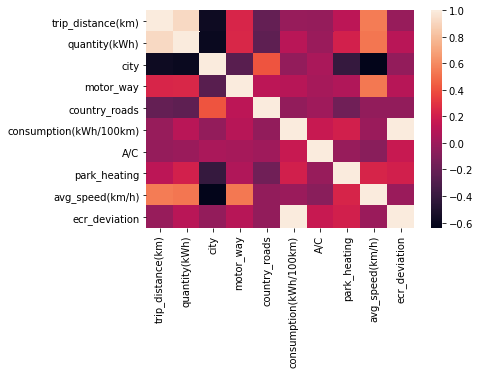

In [33]:
sb.heatmap(df.corr())
plt.show()

**Observations**

* tire_type feature has no effect in predicting distance_range

* 'city', 'motor_way', 'driving_style',  'avg_speed(km/h)' impacts the trip distance.

* A/C on has some effect on consumption and consumption have effect on driving range.

* quantity above 20kwh is directly proportional to trip distance.


**Outliers**

* In Quantity, We can see the outliers in range >= 40
* In Energy Consumption, very few outliers  above 50 kwh/100km
* In Avg Speed, few outliers are below 10 and above 80 km/h

# Understanding the Outliers

In [20]:
outliers_df = df[
    (df['quantity(kWh)'] > 40) |
    (df['consumption(kWh/100km)'] > 50) |
    (df['avg_speed(km/h)'] < 10) |
    (df['avg_speed(km/h)'] > 80)
]

In [21]:
outliers_df.shape

(78, 12)

In [23]:
outliers_df

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
37,82.0,15.13,Winter tires,0,0,1,Normal,15.2,0,1,83.0,-1.6
77,74.0,14.51,Summer tires,0,1,0,Normal,15.2,0,1,85.0,-1.6
99,73.0,12.72,Summer tires,0,1,0,Normal,13.6,0,0,82.0,-3.2
101,72.0,13.22,Summer tires,0,1,0,Normal,12.9,0,0,83.0,-3.9
114,71.0,13.67,Summer tires,0,1,0,Normal,14.2,0,0,85.0,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2991,5.0,0.60,Summer tires,1,0,0,Moderate,12.0,0,0,2.0,-4.8
3062,589.0,75.98,Summer tires,0,1,0,Moderate,12.9,0,0,68.0,-3.9
3070,451.0,51.41,Summer tires,0,1,0,Moderate,11.4,0,0,60.0,-5.4
3076,2.0,0.55,Summer tires,1,0,1,Normal,27.5,0,0,6.0,10.7


In [24]:
non_outliers_df = df.drop(index = outliers_df.index)

In [29]:
non_outliers_df.to_csv(input_dataset_parent_path+'eda_outliers_removed.csv', index=False)

In [30]:
df.to_csv(input_dataset_parent_path + 'eda_with_outliers.csv', index=False)